In [1]:
import pymongo
import pandas as pd
client = pymongo.MongoClient("mongodb+srv://joshf:<password>@cluster0.0hwxf.mongodb.net/sample_supplies?retryWrites=true&w=majority")
db = client['sample_supplies']
collection = db['sales']

In [2]:
query = collection.aggregate( [
   {
     "$unwind": "$customer"
   },
   {
     "$group": {
        "_id": "$customer.age",
        "count": { "$sum": 1 }
     }
   }
] )
    

In [3]:
age = []
num = []
for doc in query:
    age.append(doc["_id"])
    num.append(doc["count"])
df = pd.DataFrame({'ages':age,'count':num})
df

,ages,count
0,63,77
1,26,76
2,54,82
3,45,110
4,31,97
5,29,92
6,46,125
7,36,124
8,65,83
9,47,117


In [4]:
bins = [15,20,25,30,35,40,45,50,55,60,65,70,75,80]
groups = df.groupby([pd.cut(df.ages, bins,right=False)]).agg({'count':'sum'})
groups

,count
ages,
"[15, 20)",168
"[20, 25)",233
"[25, 30)",407
"[30, 35)",498
"[35, 40)",650
"[40, 45)",612
"[45, 50)",586
"[50, 55)",474
"[55, 60)",440


/Applications/python-anaconda/install/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:405: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


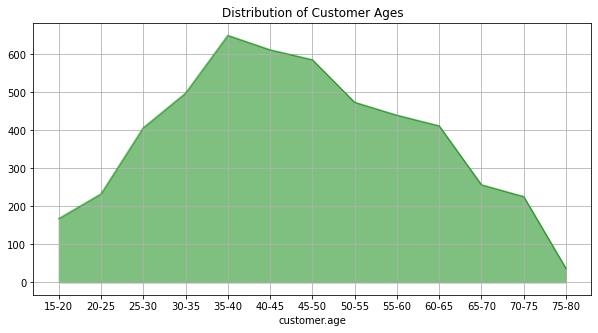

In [5]:
import matplotlib.pyplot as plt
x = [0,1,2,3,4,5,6,7,8,9,10,11,12]
plt.figure(figsize=(10,5))
plt.plot(groups['count'],color='green',alpha=0.5)
plt.title('Distribution of Customer Ages')
plt.xlabel('customer.age')
plt.xticks(x,['15-20','20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65','65-70','70-75','75-80'])
plt.fill_between(x,y1=0,y2=groups['count'],color='green',alpha=0.5)
plt.grid()
plt.show()